In [1]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = "stix"  # The setting of math font

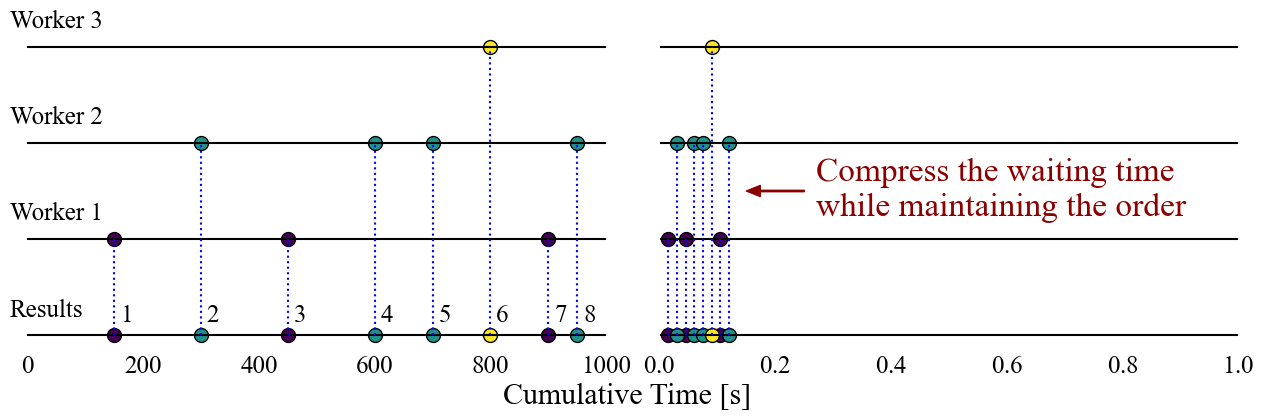

In [2]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4), gridspec_kw=dict(wspace=0.04))

def plot_worker_order(ax, xs, text: bool = True, s=100, x_factor=1):
    xmax = 1000 * x_factor

    ax.tick_params(left=False, bottom=False, labelleft=False)
    ax.hlines([0, 1, 2, 3], 0, xmax, color="black")
    ax.hlines([-1], 0, xmax, color="black", linestyle="dotted")

    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

    X = []

    cm = plt.get_cmap()
    colors = [cm(i / 2) for i in range(3)]
    for i, (x, color) in enumerate(zip(xs, colors), start=1):
        y = [i] * len(x)
        if text:
            ax.text(-30 * x_factor, i + 0.2, f"Worker {i}")
        
        x_factored = [v * x_factor for v in x]
        ax.vlines(x_factored, 0, i, color="blue", linestyle="dotted")
        ax.scatter(x_factored, y, color=color, s=s, facecolor=color, edgecolor="black")
        ax.scatter(x_factored, [0] * len(x), color=color, s=s, facecolor=color, edgecolor="black")
        X += x_factored

    X_sorted = np.sort(X)
    if text:
        for i, x in enumerate(X_sorted, start=1):
            ax.text((x + 10) * x_factor, 0.15, str(i))

    if text:
        ax.text(-30 * x_factor, 0.2, "Results")
    if x_factor < 0.1:
        ax.ticklabel_format(style="sci", scilimits=(0,0), axis="x", useMathText=True)

    ax.set_xlim(0, xmax + 50 * x_factor)
    ax.set_ylim(-0.1, 3.1)


xs = [
    [150, 450, 900],
    [300, 600, 700, 950],
    [800],
]
plot_worker_order(axes[0], xs)

factor = 15
xs = [
    [i * factor for i in [1, 3, 7]],
    [i * factor for i in [2, 4, 5, 8]],
    [i * factor for i in [6]],
]
ax = axes[1]
x_factor = 1e-3
plot_worker_order(ax, xs, text=False, x_factor=x_factor)
ax.annotate(
    "",
    xy=(150 * x_factor, 1.5),
    xytext=(250 * x_factor, 1.5),
    arrowprops=dict(
        shrink=0,
        width=1,
        headwidth=8,
        headlength=10,
        connectionstyle="arc3",
        facecolor="darkred",
        edgecolor="darkred",
    )
)
ax.text(270 * x_factor, 1.25, "Compress the waiting time\nwhile maintaining the order", fontsize=24, color="darkred")

fig.supxlabel("Cumulative Time [s]", y=-0.05)

plt.savefig("compress-conceptual.pdf", bbox_inches="tight")

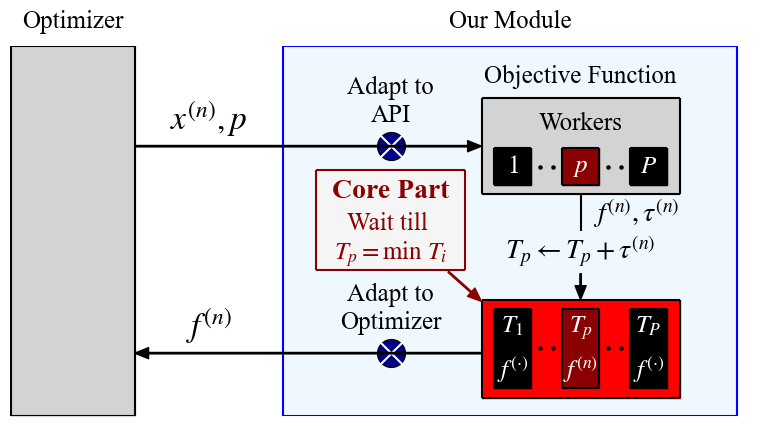

In [10]:
def plot_rectangle(
    ax: plt.Axes,
    left: float,
    right: float,
    bottom: float,
    top: float,
    edgecolor: str | None = None,
    alpha: float = 1.0,
    facecolor: str | None = None,
) -> None:
    ax.hlines([bottom, top], left, right, color=edgecolor)
    ax.vlines([left, right], bottom, top, color=edgecolor)
    if facecolor is not None:
        ax.fill_between([left, right], [bottom] * 2, [top] * 2, alpha=alpha, color=facecolor)


def add_arrow(ax: plt.Axes, src_pos: tuple[float, float], target_pos: tuple[float, float], color: str, linestyle: str | None = None):
    ax.annotate(
        "",
        xy=target_pos,
        xytext=src_pos,
        arrowprops=dict(
            shrink=0,
            width=1,
            headwidth=8,
            headlength=10,
            connectionstyle="arc3",
            facecolor=color,
            edgecolor=color,
            linestyle=linestyle,
        )
    )


fig, ax = plt.subplots(figsize=(9.6, 4.8))
# fig, ax = plt.subplots()

ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

width = 1.5
buffer = 2
Y = 1.1

x1, x2, x3, x4 = -1 - width - buffer, -1 - buffer, 1 + buffer, 1 + width + buffer

# mathtt

# Rectangle for our module
ax.text((x4 - 1.4) / 2, Y, "Our Module", horizontalalignment='center')
plot_rectangle(ax, left=-1.2, right=x4 - 0.2, bottom=-1, top=1, edgecolor="blue", facecolor="aliceblue")

# Rectangle for Optimizer
width = 1.2
center = (x4 + 0.3) / 2
left, right = center - width, center + width

ax.text((x1 + x2) / 2, Y, "Optimizer", horizontalalignment='center')
ax.text((x2 - 1.2) / 2, 0.55, "$x^{(n)}, p$", horizontalalignment='center', fontsize=24)
ax.text((x2 - 1.2) / 2, -0.57, "$f^{(n)}$", horizontalalignment='center', fontsize=24)
plot_rectangle(ax, left=x1, right=x2, bottom=-1, top=1, edgecolor="black", facecolor="lightgray")

add_arrow(ax, src_pos=(x2, 0.46), target_pos=(left, 0.46), color="black")

# From opt to obj
ax.vlines(center, 0.2, 0, color="black")
add_arrow(ax, src_pos=(center, -0.23), target_pos=(center, -0.37), color="black")
ax.scatter((left - 1) / 2, 0.46, facecolor="darkblue", edgecolor="black", s=400, alpha=1.0)
ax.scatter((left - 1) / 2, 0.46, facecolor="white", marker="x", s=400)

# From obj to opt
add_arrow(ax, src_pos=(left, -0.66), target_pos=(x2, -0.66), color="black")
ax.scatter((left - 1) / 2, -0.66, facecolor="darkblue", edgecolor="black", s=400, alpha=1.0)
ax.scatter((left - 1) / 2, -0.66, facecolor="white", marker="x", s=400)

ax.text((left - 1) / 2, 0.70, "Adapt to\nAPI", horizontalalignment='center', verticalalignment="center")
ax.text((left - 1) / 2, -0.42, "Adapt to\nOptimizer", horizontalalignment='center', verticalalignment="center")

ax.text(center + 0.15, 0.05, "$f^{(n)}, \\tau^{(n)}$", fontsize=20)
ax.text(center, -0.15, "$T_p \\leftarrow T_p + \\tau^{(n)}$", horizontalalignment='center', fontsize=20)

# Rectangle for Objective function
ax.text(center, Y - 0.3, "Objective Function", horizontalalignment='center')
plot_rectangle(ax, left=left, right=right, bottom=0.2, top=0.72, facecolor="lightgray", edgecolor="black")

# Workers in the objective function
# worker 1
worker_left, worker_right = left + 0.15, left + (right - left) / 4
plot_rectangle(ax, left=worker_left, right=worker_right, bottom=0.25, top=0.45, facecolor="black", edgecolor="black")
ax.text((worker_left + worker_right) / 2, 0.35, "$1$", horizontalalignment='center', verticalalignment='center', color="white")

# worker p
step = (right - left) / 4 - 0.15
worker_left, worker_right = left + (right - left) / 2 - step / 2, left + (right - left) / 2 + step / 2
plot_rectangle(ax, left=worker_left, right=worker_right, bottom=0.25, top=0.45, facecolor="darkred", edgecolor="black")
ax.text((worker_left + worker_right) / 2, 0.35, "$p$", horizontalalignment='center', verticalalignment='center', color="white")

# worker P
worker_left, worker_right = right - (right - left) / 4, right - 0.15
plot_rectangle(ax, left=worker_left, right=worker_right, bottom=0.25, top=0.45, facecolor="black", edgecolor="black")
ax.text((worker_left + worker_right) / 2, 0.35, "$P$", horizontalalignment='center', verticalalignment='center', color="white")

width = right - left
ax.text((left + right) / 2, 0.55, "Workers", horizontalalignment='center')
ax.scatter([left + 19 * width / 64, left + 23 * width / 64, left + 41 * width / 64, left + 45 * width / 64], [0.35] * 4, s=5, color="black")

# Storage
plot_rectangle(ax, left=left, right=right, bottom=-0.9, top=-0.37, facecolor="red", edgecolor="black")

# Result 1
worker_left, worker_right = left + 0.15, left + (right - left) / 4
plot_rectangle(ax, left=worker_left, right=worker_right, bottom=-0.85, top=-0.42, facecolor="black", edgecolor="black")
ax.text((worker_left + worker_right) / 2, -0.75, "$f^{(\cdot)}$", horizontalalignment='center', verticalalignment='center', color="white")
ax.text((worker_left + worker_right) / 2, -0.55, "$T_1$", horizontalalignment='center', color="white")

# Result p
step = (right - left) / 4 - 0.15
worker_left, worker_right = left + (right - left) / 2 - step / 2, left + (right - left) / 2 + step / 2
plot_rectangle(ax, left=worker_left, right=worker_right, bottom=-0.85, top=-0.42, facecolor="darkred", edgecolor="black")
ax.text((worker_left + worker_right) / 2, -0.75, "$f^{(n)}$", horizontalalignment='center', verticalalignment='center', color="white")
ax.text((worker_left + worker_right) / 2, -0.55, "$T_p$", horizontalalignment='center', color="white")

# Result P
worker_left, worker_right = right - (right - left) / 4, right - 0.15
plot_rectangle(ax, left=worker_left, right=worker_right, bottom=-0.85, top=-0.42, facecolor="black", edgecolor="black")
ax.text((worker_left + worker_right) / 2, -0.75, "$f^{(\cdot)}$", horizontalalignment='center', verticalalignment='center', color="white")
ax.text((worker_left + worker_right) / 2, -0.55, "$T_P$", horizontalalignment='center', color="white")

ax.scatter([left + 19 * width / 64, left + 23 * width / 64, left + 41 * width / 64, left + 45 * width / 64], [-0.63] * 4, s=5, color="black")
plot_rectangle(ax, left=(left - 1) / 2 - 0.9, right=(left - 1) / 2 + 0.9, top=0.33, bottom=-0.21, edgecolor="darkred", facecolor="whitesmoke")
ax.text((left - 1) / 2, 0.18, "Core Part", color="darkred", weight="bold", fontsize=20, horizontalalignment='center')
ax.text((left - 1) / 2, -0.05, "Wait till \n$T_p = \min~T_i$", horizontalalignment='center', verticalalignment="center", color="darkred")
add_arrow(ax, (0.8, -0.22), (left, -0.38), color="darkred")

ax.set_xlim(x1 - 0.01, x4)
ax.set_ylim(-1, 1)

plt.savefig("api-conceptual.png", bbox_inches="tight")